In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = np.load("x.npy")
y = np.load("y.npy")

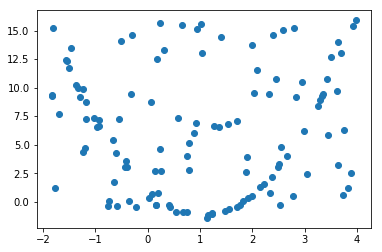

In [8]:
plt.scatter(x, y)

In [25]:
idx = np.random.randint(0, len(x), 3)
x[idx]

array([-0.74125053,  0.79734858,  2.95702848])

In [110]:
def poly(x, a):
    return x ** 2 * a[2] + x * a[1] + a[0]

#def poly(x, a):
#    return x ** 2 * a[0] + x * a[1] + x * a[2]

def ransac(x, y, k=1000, threshold=0.05):
    best_inliers = 0
    best_model = None
    for t in range(k):
        # Sample:
        idx = np.random.randint(0, len(x), 3)
        x_sample, y_sample = x[idx], y[idx]
        # Fit model:
        X = np.array([np.ones(3), x_sample, x_sample ** 2]).T
        output = np.linalg.lstsq(X, y_sample)
        a = output[0]
        # Calc inliers:
        y_predicted = poly(x, a)
        errors = np.abs(y - y_predicted)
        inliers = (errors < threshold).sum()
        if inliers > best_inliers:
            best_inliers = inliers
            best_model = a
            sampled_points = x_sample, y_sample
    return best_model, best_inliers, sampled_points

In [112]:
model, inliers, sampled_points = ransac(x,y, k=1000, threshold=0.05)
print("Model: ", model)
print("Inliers: ", inliers)
print("sampled points: ", sampled_points)

/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


Model:  [ 0.9945848  -4.16890986  1.99033858]
Inliers:  17
sampled points:  (array([-1.18385031,  0.68399886,  0.43111354]), array([ 8.7194126 , -0.92575605, -0.43276659]))


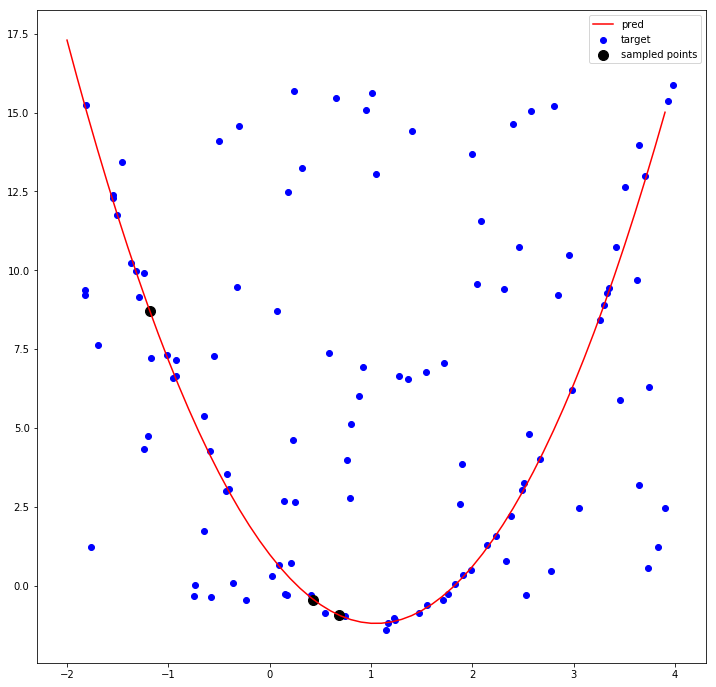

In [118]:
x_range = np.arange(-2, 4, 0.1)
y_pred = poly(x_range, model)
plt.figure(figsize=(12, 12))
plt.plot(x_range, y_pred, label="pred", color="r")
plt.scatter(x, y, label="target", color="b")
plt.scatter(sampled_points[0], sampled_points[1], label="sampled points", color="black", s=100)
plt.legend()